http://www.scipy-lectures.org/

In [1]:
import numpy as np

In [42]:
x = np.linspace(1,8,5)

In [43]:
x.shape

(5,)

In [44]:
y = np.sin(x)

In [45]:
y.shape


(5,)

In [46]:
for i in range(y.shape[0]-1):
    print( (y[i+1]-y[i]),(y[i+1]-y[i])/(x[i+1]-x[i]))
    

-0.459809992756 -0.262748567289
-1.35919110972 -0.776680634124
0.944350901118 0.539629086353
1.02253746317 0.584307121812


In [47]:
y[1:]-y[:-1]

array([-0.45980999, -1.35919111,  0.9443509 ,  1.02253746])

In [48]:
y[1:]

array([ 0.38166099, -0.97753012, -0.03317922,  0.98935825])

In [ ]:
(y[1:]-y[:-1])/(x[1:]-x[:-1])

In [ ]:
np.diff(y)

In [50]:
np.diff(x)

array([ 1.75,  1.75,  1.75,  1.75])

In [31]:
np.roll(y,-1)

array([ 0.38166099, -0.97753012, -0.03317922,  0.98935825,  0.84147098])

In [30]:
y

array([ 0.84147098,  0.38166099, -0.97753012, -0.03317922,  0.98935825])

In [32]:
np.gradient(y)

array([-0.45980999, -0.90950055, -0.2074201 ,  0.98344418,  1.02253746])

In [66]:
import sympy

In [67]:
X = sympy.Symbol('X')

In [68]:
expr  =  (sympy.sin(X**2+1*sympy.cos(sympy.exp(X)))).diff(X)

In [73]:
expr

(2*X - exp(X)*sin(exp(X)))*cos(X**2 + cos(exp(X)))

In [71]:
f = sympy.lambdify(X,expr,"numpy")

In [72]:
f( np.array([1,2,3]))

array([  0.87994175,   0.67977486,  12.91025851])

In [77]:
import ipywidgets as widgets
from ipywidgets import interact

In [79]:
widgets.IntSlider?

In [82]:
@interact(x=widgets.IntSlider(1,2,10,1))
def g(x=1):
    print(x)

8


## Całka oznaczona

$$\int_a^b f(x) dx = \lim_{n\to\infty} \sum_{i=1}^{n} f(\hat x_i) \Delta x_i$$

In [68]:
import numpy as np
N = 10
x = np.linspace( 0,np.pi*1.23, N)

In [69]:
f = np.sin(x)

In [70]:
x,f

(array([ 0.        ,  0.429351  ,  0.85870199,  1.28805299,  1.71740398,
         2.14675498,  2.57610598,  3.00545697,  3.43480797,  3.86415896]),
 array([ 0.        ,  0.41628079,  0.75699506,  0.96029369,  0.98927233,
         0.83867057,  0.53582679,  0.13571557, -0.2890318 , -0.66131187]))

In [71]:
np.diff(x)

array([ 0.429351,  0.429351,  0.429351,  0.429351,  0.429351,  0.429351,
        0.429351,  0.429351,  0.429351])

In [72]:
np.sum(f[:-1]*np.diff(x))

1.8651106037884004

In [73]:
w = np.ones_like(x)
h = np.diff(x)[0]

In [74]:
w[-1] = 0  


In [75]:
h*np.sum(w*f)

1.8651106037884

In [76]:
w[0] = 0.5 
w[-1] = 0.5 
h*np.sum(w*f)

1.7231431497698426

In [77]:
import scipy.integrate

In [78]:
scipy.integrate.

SyntaxError: invalid syntax (<ipython-input-78-52697efd3bc2>, line 1)

## Całka nieoznaczona

$$\int_a^x f(y) dy = \lim_{n\to\infty} \sum_{i=1}^{n} f(\hat y_i) \Delta y_i$$

In [79]:
np.cumsum(f)*h

array([ 0.        ,  0.17873057,  0.50374715,  0.9160502 ,  1.34079527,
        1.70087931,  1.93093708,  1.98920669,  1.8651106 ,  1.5811757 ])

In [80]:
np.sum(f)*h

1.5811756957512852

In [82]:
f.shape,np.cumsum(f).shape

((10,), (10,))

## Pochodne funkcji wielu zmiennych



In [101]:
x = np.linspace(0,2,50)
y = np.linspace(0,2,50)

In [102]:
X,Y = np.meshgrid(x,y,indexing='xy')

In [103]:
X

array([[ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ],
       [ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ],
       [ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ],
       ..., 
       [ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ],
       [ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ],
       [ 0.        ,  0.04081633,  0.08163265, ...,  1.91836735,
         1.95918367,  2.        ]])

In [104]:
F = np.sin(X**2 + Y)

In [105]:
F[1,2],X[1,2],Y[1,2]

(0.047462378916894261, 0.081632653061224483, 0.040816326530612242)

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

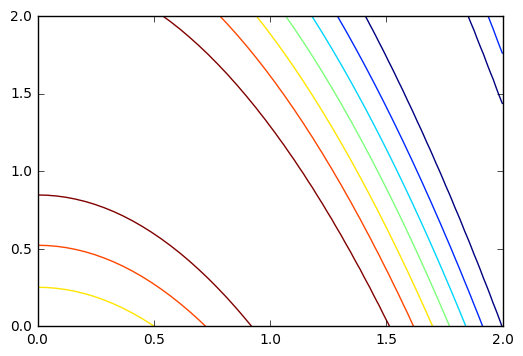

In [108]:
plt.contour(X,Y,F)

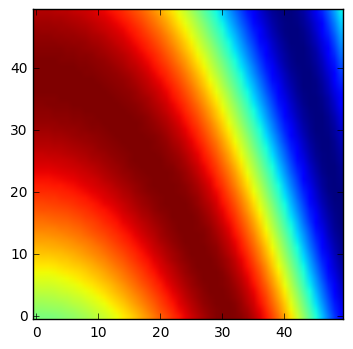

In [110]:
plt.imshow(F,origin='lower')

In [117]:
np.diff(F,axis=1).shape

(50, 49)

In [118]:
np.diff(F,2,axis=0).shape

(48, 50)